In [1]:
import matplotlib.pyplot as plt
import numpy as np
import magpylib as magpy
import random
import pandas as pd
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

In [2]:
number_causal_genes = 5
number_total_genes = 200

In [3]:
# Choose positions of causal genes
magnet_positions = [179, 198, 12, 18, 144] #[random.randint(0, number_total_genes) for _ in range(number_causal_genes)]
print("List of positions:", magnet_positions)

List of positions: [179, 198, 12, 18, 144]


In [4]:
# Initialise magnets
pol = 2
size = 1
cube1 = magpy.magnet.Cuboid(polarization=(pol, 0, 0), dimension=(size, size, 1))
cube2 = magpy.magnet.Cuboid(polarization=(pol, 0, 0), dimension=(size, size, 1))
cube3 = magpy.magnet.Cuboid(polarization=(pol, 0, 0), dimension=(size, size, 1))
cube4 = magpy.magnet.Cuboid(polarization=(pol, 0, 0), dimension=(size, size, 1))
cube5 = magpy.magnet.Cuboid(polarization=(pol, 0, 0), dimension=(size, size, 1))
magnets_list = [cube1, cube2, cube3, cube4, cube5]

In [5]:
random.randint(-40, 0)

-33

In [6]:
magnets_used = 0
duds_list = []
for i in range(number_total_genes):
    y_pos = i
    # Choose a strength (nearness to dashed line)
    x_pos = random.randint(-40, 0)
    if i in magnet_positions:
        # Update position of magnet
        magnets_list[magnets_used].position = (x_pos,y_pos,0)
        magnets_used += 1
    else:
        # Make a dud
        duds_list.append([x_pos,y_pos])
    

In [7]:
# Make collection of the magnets
# coll = magpy.Collection(cube1, cube2, cube3, cube4, cube5)

In [8]:
zero_threshold = 0.0001

In [12]:
col_titles = ["Feature_" + str(i) for i in range(number_total_genes)]
col_titles.append("phenotype")

In [13]:
coll_exp = magpy.Collection(magnets_list, override_parent=True)

In [15]:
polarisation_levels = [0,1,2]
polarisation_probabilities = [0.6, 0.3, 0.1]

In [16]:
NUM_SAMPLES = 1000
data_df = pd.DataFrame()
polarisation_df = pd.DataFrame()

for j in range(NUM_SAMPLES):

    magnets_used = 0
    duds_list = []
    overall_list = [] # List does not discriminate between magnet and dud
    polarisation_list = []
    for i in range(number_total_genes):
        y_pos = i
        # Choose a strength (nearness to dashed line)
        x_pos = np.random.uniform(-40,5)
        pol =  random.choices(polarisation_levels, weights=polarisation_probabilities, k=1)[0],0,0 #(random.randint(0,2),0,0)
        if i in magnet_positions:
            # Update position of magnet
            magnets_list[magnets_used].position = (x_pos,y_pos,0)
            magnets_list[magnets_used].polarization = pol
            magnets_used += 1
        else:
            # Make a dud
            duds_list.append([x_pos,y_pos])
        overall_list.append(x_pos)
        polarisation_list.append(pol[0])
    
    # Create an observer grid in the xz-symmetry plane
    X, Y = np.mgrid[-50:50:1000j, 0:number_total_genes:1000j].transpose((0, 2, 1))
    grid = np.stack([X, Y, np.zeros((1000, 1000))], axis=2)

    H = coll_exp.getH(grid)

    phenotype =  np.mean(H[:,700,0])
    overall_list.append(phenotype)
    polarisation_list.append(phenotype)

    data_df = pd.concat([data_df, pd.DataFrame(overall_list).T])
    polarisation_df = pd.concat([polarisation_df, pd.DataFrame(polarisation_list).T])
    print(phenotype)

1.6200038209900423
0.0
0.7566173461831236
6.274445512452002
1.4909937063794059
0.5372945087329358
1.774889574150045
1.1701011436980164
0.863266104632825
3.5711190343887655
0.36403073862538854
2.782393942823125
0.14588611900597181
0.0
0.6288940240695698
2.6879226585747853
1.8355975246804124
0.5147361945831141
0.40095123011228007
0.3880558120673181
0.8998011336016443
1.606803354039142
0.643093908866495
0.41538901176998727
2.0779185801341105
0.4399507491506427
6.243178300803225
4.241821454034176
1.8655240408716798
0.9224938580307401
0.5732841901159893
0.9790501870177449
0.8491508109447085
0.32019523356715357
0.8893632006830803
1.7828021319733727
1.0609104787695365
0.4693439585459017
0.9155659635430863
1.3250957325618011
3.942789172938561
3.1460473371330617
0.0
0.24576652680217884
5.777586328936229
4.3281442086469655
1.3180033772331736
0.2704122541846524
1.423744083025764
1.1333301274736862
4.952921025072835
2.1581130969371487
1.6615137384759957
0.4514464641867464
1.612459081021948
0.65009

In [17]:
polarisation_df

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.620004
0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.000000
0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.756617
0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,6.274446
0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.490994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,2.0,0.0,0.0,2.0,1.0,1.0,0.941450
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.922898
0,2.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,...,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.087176
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,3.140595


In [18]:
data_df

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,-14.560726,-29.174853,-30.219015,-20.703540,-27.245609,-6.855496,-29.970324,-37.541994,-13.723348,4.978868,...,-2.625085,-35.895294,-24.132941,-15.285674,-5.001560,-15.194465,-28.097855,-22.069756,-13.362686,1.620004
0,-23.660365,-14.238357,-1.218080,-19.879584,-39.776027,-27.457098,-29.717173,-1.433078,-19.108184,-1.022080,...,-4.513075,-12.624437,-38.697442,-24.210011,-22.065143,-12.662580,-33.274614,-33.156084,-22.141083,0.000000
0,-33.835094,4.398591,-34.336234,-19.833219,-8.572251,-33.040140,-19.435081,-12.193901,-19.538961,-37.781793,...,-37.518731,-24.464410,-27.024110,-27.686923,-12.833227,-14.032880,-15.703531,-2.578970,-4.681123,0.756617
0,-0.750988,-22.669432,-20.370383,-11.911836,-18.859337,-36.930333,-13.999532,-37.434460,4.583349,-29.814671,...,-20.520564,-10.940225,-3.471428,-18.504450,-24.950003,-26.293561,-39.101160,-20.010713,-31.679717,6.274446
0,-29.926937,-9.012730,-10.429397,-13.298132,4.085019,-0.286924,-2.483403,-26.672612,-1.920923,-3.859997,...,-3.770522,-10.945585,-27.071284,-16.145115,-37.480422,-15.897819,-7.226805,-26.497660,-31.643722,1.490994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-2.213484,-37.483021,-11.551698,4.194093,-5.288259,4.978758,-8.458777,-4.329105,-27.917666,-9.963139,...,-38.038837,3.224699,-8.068871,-26.441692,-32.346926,-35.660695,-35.913751,-21.491766,-10.112239,0.941450
0,-9.924243,-18.654299,-32.432225,-38.075925,-29.481543,-39.303074,-2.423658,-2.997648,-15.166713,-34.435691,...,-32.873735,-6.924580,-34.517070,-36.344467,4.553065,-37.895821,-3.334510,-26.082293,3.824667,1.922898
0,-4.510743,0.574865,-7.985110,-37.484152,-18.435795,-8.159112,-35.900718,-22.960154,-36.290558,4.812556,...,-31.485256,-27.044965,-39.480744,-13.185172,-1.468561,-14.865670,-7.897504,-28.406538,-22.015801,2.087176
0,-37.177201,-11.484056,-34.506324,-38.354191,2.187943,-27.200052,-8.571678,-4.144284,1.363796,-3.455352,...,-31.911241,-15.856280,-16.178337,-28.515094,3.645680,-16.156567,-32.213821,-8.449480,-2.512097,3.140595


In [19]:
data_df_renames = data_df.rename(columns=dict(zip(data_df.columns, col_titles)))
data_df_renames

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_191,Feature_192,Feature_193,Feature_194,Feature_195,Feature_196,Feature_197,Feature_198,Feature_199,phenotype
0,-14.560726,-29.174853,-30.219015,-20.703540,-27.245609,-6.855496,-29.970324,-37.541994,-13.723348,4.978868,...,-2.625085,-35.895294,-24.132941,-15.285674,-5.001560,-15.194465,-28.097855,-22.069756,-13.362686,1.620004
0,-23.660365,-14.238357,-1.218080,-19.879584,-39.776027,-27.457098,-29.717173,-1.433078,-19.108184,-1.022080,...,-4.513075,-12.624437,-38.697442,-24.210011,-22.065143,-12.662580,-33.274614,-33.156084,-22.141083,0.000000
0,-33.835094,4.398591,-34.336234,-19.833219,-8.572251,-33.040140,-19.435081,-12.193901,-19.538961,-37.781793,...,-37.518731,-24.464410,-27.024110,-27.686923,-12.833227,-14.032880,-15.703531,-2.578970,-4.681123,0.756617
0,-0.750988,-22.669432,-20.370383,-11.911836,-18.859337,-36.930333,-13.999532,-37.434460,4.583349,-29.814671,...,-20.520564,-10.940225,-3.471428,-18.504450,-24.950003,-26.293561,-39.101160,-20.010713,-31.679717,6.274446
0,-29.926937,-9.012730,-10.429397,-13.298132,4.085019,-0.286924,-2.483403,-26.672612,-1.920923,-3.859997,...,-3.770522,-10.945585,-27.071284,-16.145115,-37.480422,-15.897819,-7.226805,-26.497660,-31.643722,1.490994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-2.213484,-37.483021,-11.551698,4.194093,-5.288259,4.978758,-8.458777,-4.329105,-27.917666,-9.963139,...,-38.038837,3.224699,-8.068871,-26.441692,-32.346926,-35.660695,-35.913751,-21.491766,-10.112239,0.941450
0,-9.924243,-18.654299,-32.432225,-38.075925,-29.481543,-39.303074,-2.423658,-2.997648,-15.166713,-34.435691,...,-32.873735,-6.924580,-34.517070,-36.344467,4.553065,-37.895821,-3.334510,-26.082293,3.824667,1.922898
0,-4.510743,0.574865,-7.985110,-37.484152,-18.435795,-8.159112,-35.900718,-22.960154,-36.290558,4.812556,...,-31.485256,-27.044965,-39.480744,-13.185172,-1.468561,-14.865670,-7.897504,-28.406538,-22.015801,2.087176
0,-37.177201,-11.484056,-34.506324,-38.354191,2.187943,-27.200052,-8.571678,-4.144284,1.363796,-3.455352,...,-31.911241,-15.856280,-16.178337,-28.515094,3.645680,-16.156567,-32.213821,-8.449480,-2.512097,3.140595


In [20]:
data_df_renames = data_df_renames.reset_index(drop=True)
data_df_renames

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_191,Feature_192,Feature_193,Feature_194,Feature_195,Feature_196,Feature_197,Feature_198,Feature_199,phenotype
0,-14.560726,-29.174853,-30.219015,-20.703540,-27.245609,-6.855496,-29.970324,-37.541994,-13.723348,4.978868,...,-2.625085,-35.895294,-24.132941,-15.285674,-5.001560,-15.194465,-28.097855,-22.069756,-13.362686,1.620004
1,-23.660365,-14.238357,-1.218080,-19.879584,-39.776027,-27.457098,-29.717173,-1.433078,-19.108184,-1.022080,...,-4.513075,-12.624437,-38.697442,-24.210011,-22.065143,-12.662580,-33.274614,-33.156084,-22.141083,0.000000
2,-33.835094,4.398591,-34.336234,-19.833219,-8.572251,-33.040140,-19.435081,-12.193901,-19.538961,-37.781793,...,-37.518731,-24.464410,-27.024110,-27.686923,-12.833227,-14.032880,-15.703531,-2.578970,-4.681123,0.756617
3,-0.750988,-22.669432,-20.370383,-11.911836,-18.859337,-36.930333,-13.999532,-37.434460,4.583349,-29.814671,...,-20.520564,-10.940225,-3.471428,-18.504450,-24.950003,-26.293561,-39.101160,-20.010713,-31.679717,6.274446
4,-29.926937,-9.012730,-10.429397,-13.298132,4.085019,-0.286924,-2.483403,-26.672612,-1.920923,-3.859997,...,-3.770522,-10.945585,-27.071284,-16.145115,-37.480422,-15.897819,-7.226805,-26.497660,-31.643722,1.490994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.213484,-37.483021,-11.551698,4.194093,-5.288259,4.978758,-8.458777,-4.329105,-27.917666,-9.963139,...,-38.038837,3.224699,-8.068871,-26.441692,-32.346926,-35.660695,-35.913751,-21.491766,-10.112239,0.941450
996,-9.924243,-18.654299,-32.432225,-38.075925,-29.481543,-39.303074,-2.423658,-2.997648,-15.166713,-34.435691,...,-32.873735,-6.924580,-34.517070,-36.344467,4.553065,-37.895821,-3.334510,-26.082293,3.824667,1.922898
997,-4.510743,0.574865,-7.985110,-37.484152,-18.435795,-8.159112,-35.900718,-22.960154,-36.290558,4.812556,...,-31.485256,-27.044965,-39.480744,-13.185172,-1.468561,-14.865670,-7.897504,-28.406538,-22.015801,2.087176
998,-37.177201,-11.484056,-34.506324,-38.354191,2.187943,-27.200052,-8.571678,-4.144284,1.363796,-3.455352,...,-31.911241,-15.856280,-16.178337,-28.515094,3.645680,-16.156567,-32.213821,-8.449480,-2.512097,3.140595


In [22]:
data_df_renames.to_csv("../../data/magnet_dataset_x_positions.csv")

Text(0.5, 0, 'Phenotype')

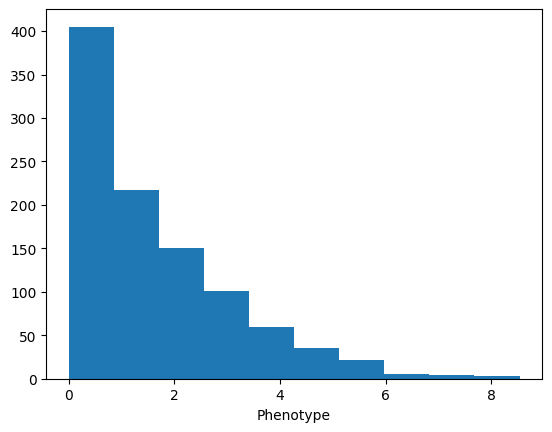

In [23]:
plt.hist(data_df_renames["phenotype"])
plt.xlabel("Phenotype")

In [24]:
polarisation_df_renames = polarisation_df.rename(columns=dict(zip(polarisation_df.columns, col_titles)))
polarisation_df_renames

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_191,Feature_192,Feature_193,Feature_194,Feature_195,Feature_196,Feature_197,Feature_198,Feature_199,phenotype
0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.620004
0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.000000
0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.756617
0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,6.274446
0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.490994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,2.0,0.0,0.0,2.0,1.0,1.0,0.941450
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.922898
0,2.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,...,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.087176
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,3.140595


In [25]:
polarisation_df_renames = polarisation_df_renames.reset_index(drop=True)
polarisation_df_renames

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_191,Feature_192,Feature_193,Feature_194,Feature_195,Feature_196,Feature_197,Feature_198,Feature_199,phenotype
0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.620004
1,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.000000
2,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.756617
3,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,6.274446
4,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.490994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,2.0,0.0,0.0,2.0,1.0,1.0,0.941450
996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.922898
997,2.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,...,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.087176
998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,3.140595


In [26]:
polarisation_df_renames.to_csv("../../data/magnet_dataset_polarisation.csv")